To Build Paths:

1. 

In [1]:
import os.path
from os import path
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipympl

In [3]:
def openDXF(filename):
    p = filename + ".dxf"
    if os.path.exists(p):
        with open(p) as f:
            lines = f.read().splitlines()
        return lines
    else:
        return False

def isolateVertex(dxf_list):
    start, end = 0, -1
    flag = False
    for i, c in enumerate(dxf_list):
        if c == "VERTEX" and flag is False:
            start = i
            flag = True
        if c == "ENDSEC":
            end = i+1
        if end > start and flag is True:
            return dxf_list[start:end]
    return None

In [15]:
filenames = ["road_for_year_456", "ways"]
l2 = []

for s in filenames:
    temp = openDXF(s)
    if temp != False:
        l1 = isolateVertex(temp)
        l2.extend(l1)
        
nodes = []

for i, c in enumerate(l2):
    if c == "VERTEX" and i<(len(l2)-10):
        nodes.append([l2[i+6], l2[i+8], l2[i+10]])

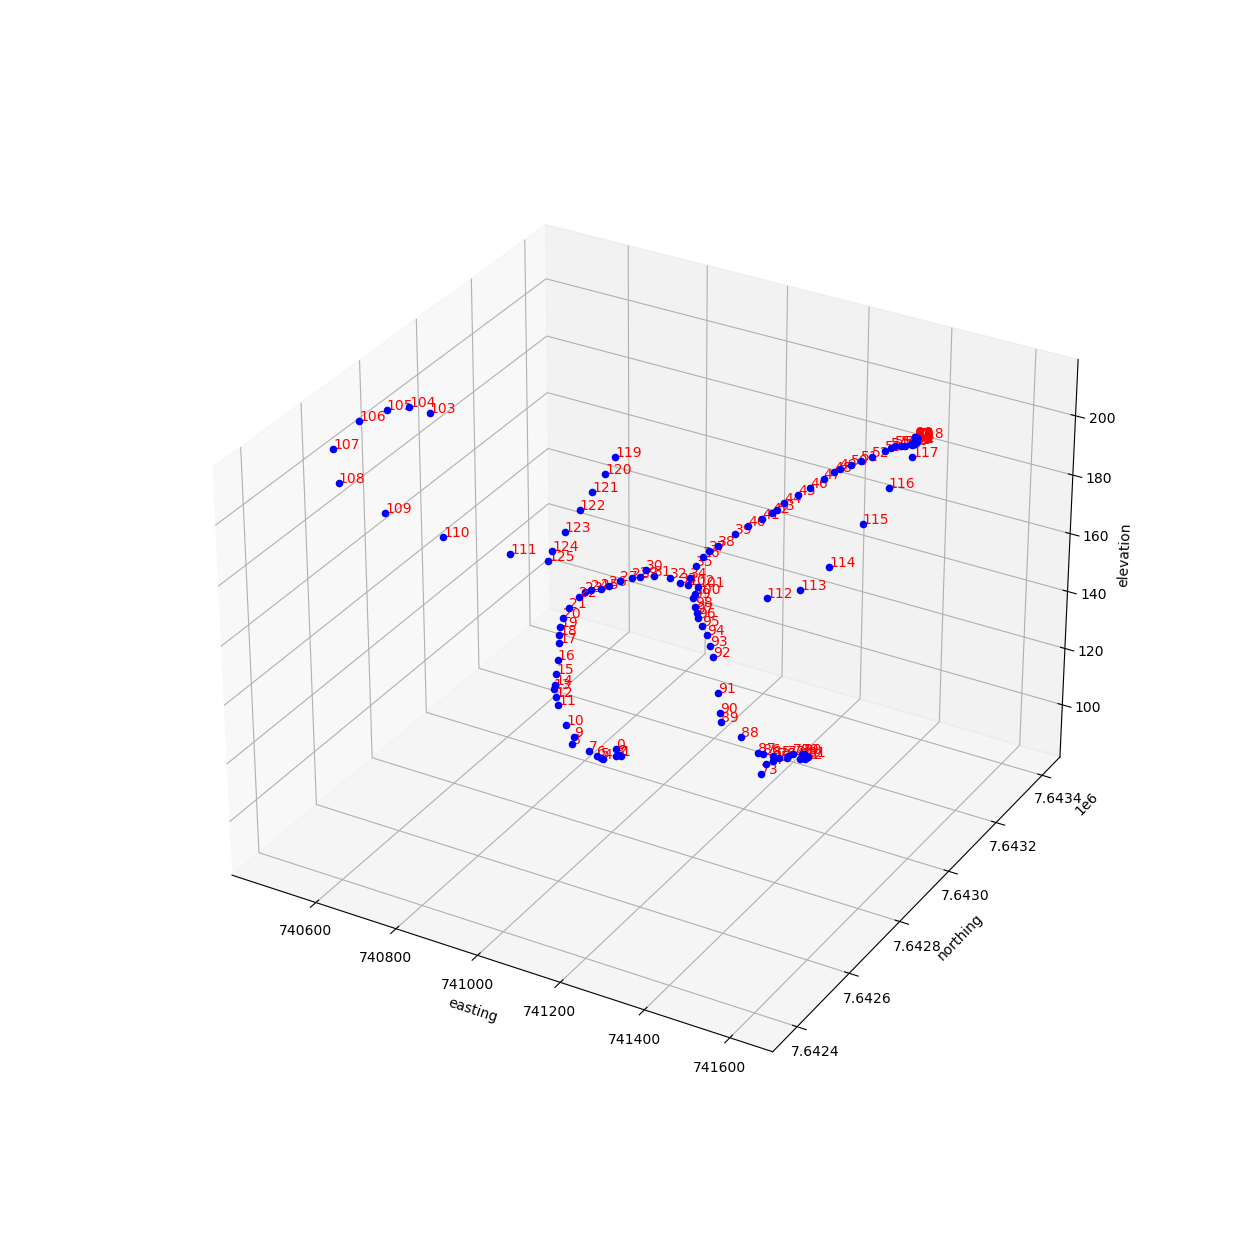

In [16]:
fig = plt.figure()
fig.set_size_inches(12.5, 12.5, forward=True)
ax = fig.add_subplot(projection='3d')
temp = [0,0,0]
flag = False

for i, point in enumerate(nodes):
    x = float(point[0])
    y = float(point[1])
    z = float(point[2])
    label = i
    ax.scatter(x, y, z, picker = 'True', color = 'b')
    ax.text(x, y, z, i, color = 'red')

ax.set_xlabel('easting')
ax.set_ylabel('northing')
ax.set_zlabel('elevation')

def onclick(event):
    global temp
    global flag
    x, y, z = event.artist._offsets3d
    a = [float(x), float(y), float(z)]
    ax.set_title(a)
    
    if a != temp and flag == True:
        ax.plot([a[0], temp[0]], [a[1], temp[1]], [a[2], temp[2]], color='black')
    else:
        flag = True
    temp = a    

def keyboardPress(event):
    global temp
    global flag
    if event.key == "z":
        ax.lines.pop(-1)
        temp, flag = [0,0,0], False
    elif event.key == "c":
        temp, flag = [0,0,0], False
    

fig.canvas.callbacks.connect('pick_event', onclick)
fig.canvas.callbacks.connect('key_press_event', keyboardPress)
plt.show()